### Project Title: Predicting Market Value of Used Cars for Rusty Bargain

##### Objective:
The goal of this project is to develop a machine learning model that predicts the market value of used cars based on their historical technical specifications and conditions. The model will be integrated into Rusty Bargain’s new app, enabling customers to quickly and accurately assess the value of their vehicles.

##### Project Scope:
###### The project involves:

   Analyzing historical car data with various features such as vehicle type, registration year, mileage, and fuel type.
   Building and comparing machine learning models including gradient boosting methods, random forest, decision tree, and linear regression.
   Optimizing for both prediction quality and efficiency, balancing training time and speed of predictions.

##### Key Evaluation Metric:
The primary metric for model performance will be the Root Mean Squared Error (RMSE), which will help measure the accuracy of the predicted car prices compared to actual prices.

##### Approach:

   Data Preprocessing: Cleaning and encoding the dataset for model training, addressing any missing values or anomalies.
   Model Building: Training multiple models and tuning hyperparameters to achieve optimal performance. The models will include:
        Linear Regression (sanity check)
        Random Forest
        Decision Tree
        LightGBM, XGBoost, and (optionally) CatBoost for gradient boosting.
   Model Evaluation: Comparing the models based on RMSE, training time, and prediction speed.
   Conclusion: Recommending the best model for Rusty Bargain’s app based on both performance and efficiency.

This project will demonstrate strong machine learning practices, including data preprocessing, feature engineering, model optimization, and a thorough comparison of algorithms.

## Data preparation

### libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import matplotlib

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn import linear_model

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint as sp_randint


# Boosting
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostRegressor, Pool, metrics, cv
import xgboost as xgb


import warnings


warnings.filterwarnings("ignore")

### data import

In [2]:
try:
    df = pd.read_csv('C:/Users/gsrav/Documents/Documents/Sprint12_Data/car_data.csv')
except:
    print('Something is wrong with your data.')

### data review

In [3]:
display(df.head())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
pd.options.display.max_columns = None
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


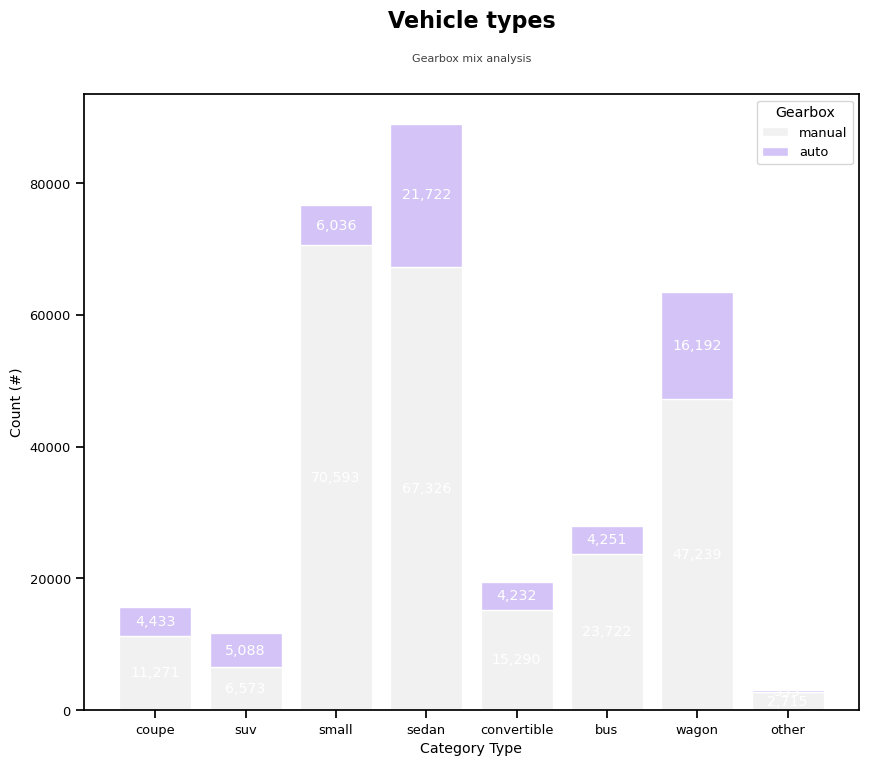

In [6]:
sns.set_context("notebook", font_scale=.85)

fig, ax = plt.subplots(figsize=(10, 8))
g = sns.countplot(data=df,
                  x='VehicleType',
                  hue='Gearbox',
                  color= '#d0bbff',
                  #palette="dark:#5A9_r",
                  ax=ax,
                  dodge=False,
                  edgecolor = "white"
                  )

ax.set(xlabel="Category Type", ylabel='Count (#)')
bottoms = {}
for bars in ax.containers:
    for bar in bars:
        x, y = bar.get_xy()
        h = bar.get_height()
        if x in bottoms:
            bar.set_y(bottoms[x])
            bottoms[x] += h
        else:
            bottoms[x] = h

for c in ax.containers:
    labels = [f'{round((v.get_height())):,}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='white')

ax.relim()  # the plot limits need to be updated with the moved bars
ax.autoscale()
ax.text(x=0.5, y=1.1, s='Vehicle types', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Gearbox mix analysis', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
# sns.despine(offset=10, trim=True)

# if we need to move legend around
# h,l = ax.get_legend_handles_labels()
# ax.legend(h[:4],l[:4], bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

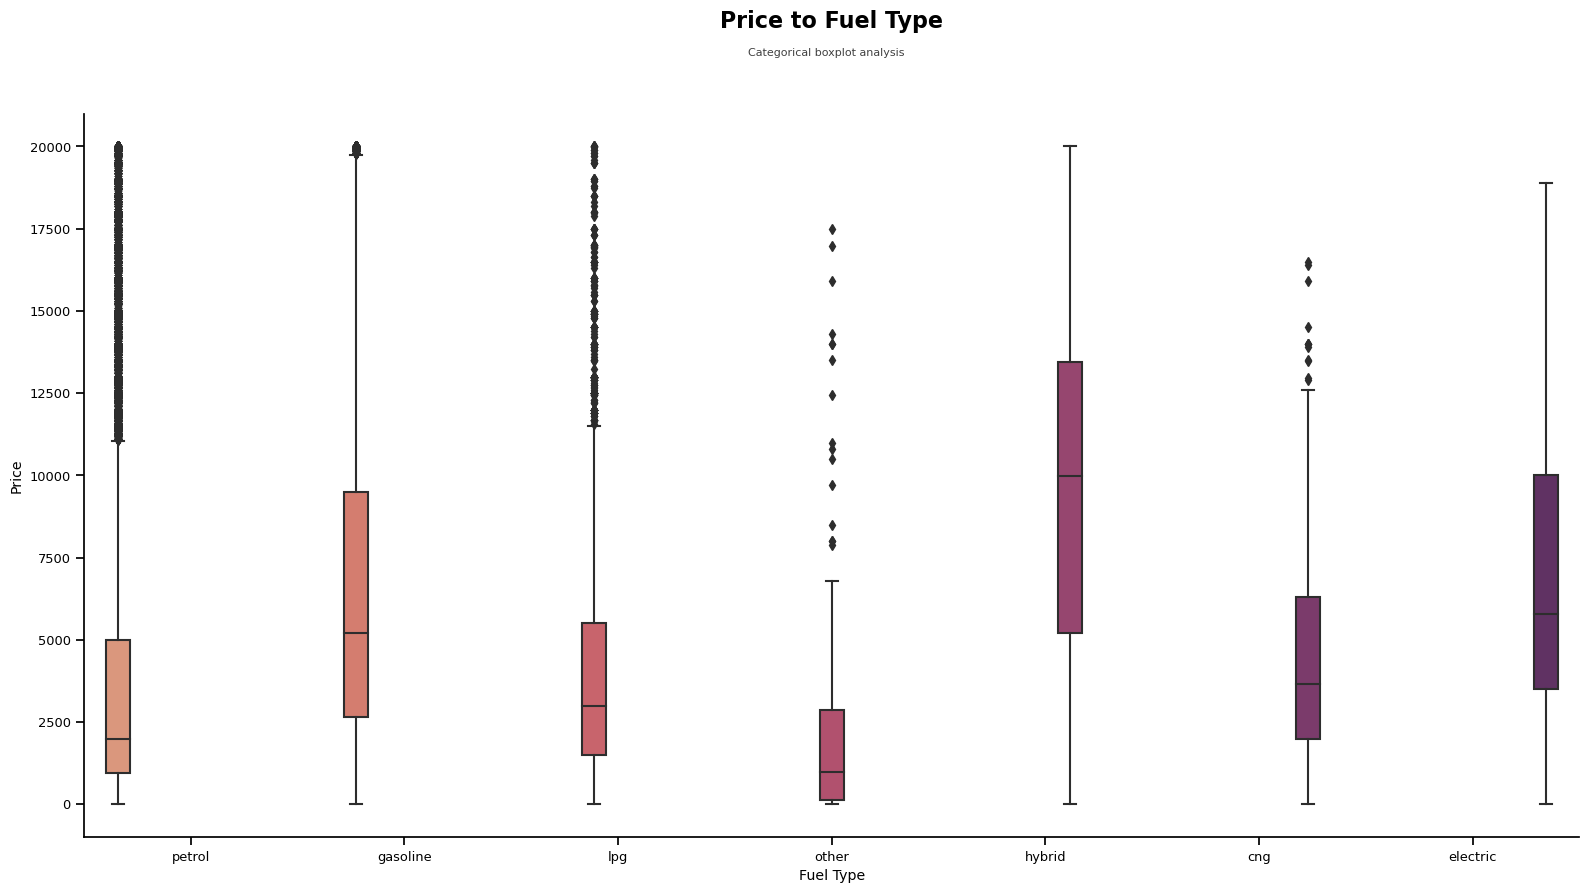

In [7]:
sns.set_context("notebook", font_scale=.85)

# Create the catplot without the ax parameter and without native_scale
g = sns.catplot(data=df,
                x='FuelType',
                y='Price',
                hue='FuelType',
                palette="flare",
                height=8,
                aspect=2,
                kind='box'
                )

# Set the labels
g.set(xlabel="Fuel Type", ylabel='Price')

# Titles
plt.title('Price to Fuel Type', x=0.5, y=1.1, fontsize=16, weight='bold', ha='center', va='bottom')
g.fig.suptitle('Categorical boxplot analysis', x=0.52, y=1.05, fontsize=8, alpha=0.75, ha='center', va='bottom')

plt.show()

### Findings
#### Findings

Features that should be removed / should have no material impact on analysis

   DateCrawled

   DateCreated

   NumberOfPictures

   LastSeen

   RegistrationMonth / PostalCode are two others to tentitatively think about removing

NaN values for features like VehicleType or Model may need to be removed after checking overall impact

   If needed, something worth exploring is filling in these values with values that are far away from any of their distributions so the model identifies them as 'outliers'. The null values in categorical features may be filled in with something like 'Unknown'.'
 
Features with dtype object will have to be encoded for regular training using LabelEncoding then we may need to use specific methods for Gradient Boosting (attempting to run both LightGBM/CatBoost with our already encoded data)

Possible normalization/standardization needed [placeholder to come back to if needed]

In [8]:
df.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures', 'LastSeen', 'PostalCode', 'RegistrationMonth'], axis=1, inplace=True)

### null value statistics

In [9]:
correlation_filter = ['Price', 'Power', 'Mileage','RegistrationYear']

df[correlation_filter].corr()

,Price,Power,Mileage,RegistrationYear
Price,1.000000,0.158872,-0.333199,0.026916
Power,0.158872,1.000000,0.024002,-0.000828
Mileage,-0.333199,0.024002,1.000000,-0.053447
RegistrationYear,0.026916,-0.000828,-0.053447,1.000000


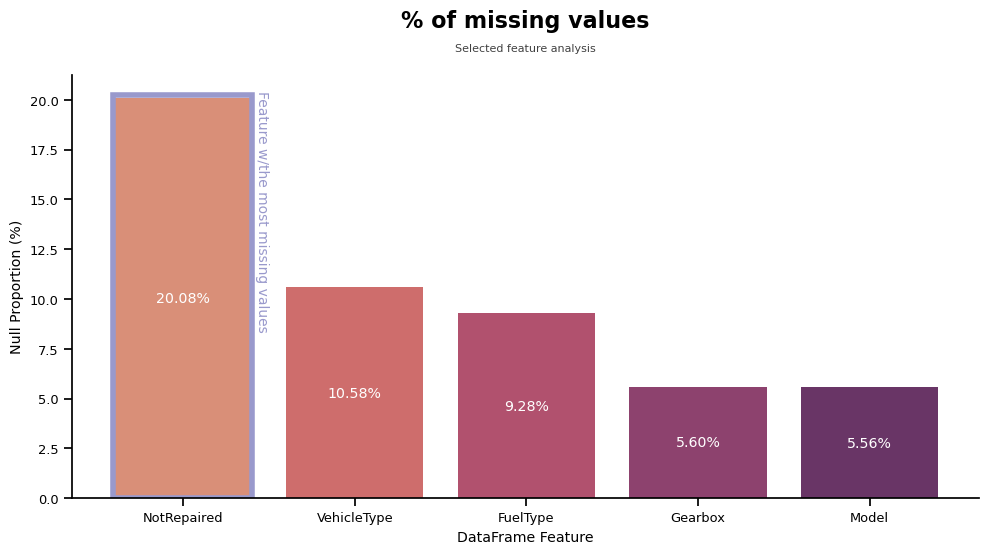

In [10]:
from matplotlib.patches import Rectangle

# Calculate missing data ratio
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': df_na})
missing_data.reset_index(inplace=True)  # Reset index to use it as a column

# Rename the index column for clarity
missing_data.rename(columns={'index': 'Feature'}, inplace=True)

# Plotting
sns.set_context("notebook", font_scale=.85)

g = sns.catplot(data=missing_data,
                x='Feature',
                y='Missing Ratio',
                kind='bar',
                height=5,
                aspect=2,
                legend=None,
                palette="flare"  # Use a palette instead of hue
                )

# Set the labels
g.set(xlabel='DataFrame Feature', ylabel='Null Proportion (%)')

# Add labels on bars
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='white')

# Title and annotations
ax.autoscale()
ax.text(x=0.5, y=1.1, s='% of missing values', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Selected feature analysis', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

# Add a rectangle patch
ax.add_patch(Rectangle((-0.41, 0), .81, 20.25, fill=False, edgecolor='#9999CC', lw=4))
ax.text(0.42, 8.5, "Feature w/the most missing values", fontsize=10, color="#9999CC", rotation=-90)

plt.show()

In [11]:
# Debating if we should fill in the missing values with a value

null_value_stats = df.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

VehicleType    37490
Gearbox        19833
Model          19705
FuelType       32895
NotRepaired    71154
dtype: int64

### encoding

In [12]:
class MultiColumnLabelEncoder: #OrdinalEncoder as a 2nd option
    def __init__(self,columns = None):
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

cat_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'] 
df_clean = MultiColumnLabelEncoder(columns = cat_columns).fit_transform(df)
display(df_clean)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
0,480,8,1993,1,0,116,150000,6,38,2
1,18300,2,2011,1,190,250,125000,2,1,1
2,9800,6,2004,0,163,117,125000,2,14,2
3,1500,5,2001,1,75,116,150000,6,38,0
4,3600,5,2008,1,69,101,90000,2,31,0
...,...,...,...,...,...,...,...,...,...,...
354364,0,8,2005,1,0,78,150000,6,22,1
354365,2200,8,2005,2,0,250,20000,7,33,2
354366,1199,1,2000,0,101,106,125000,6,32,0
354367,9200,0,1996,1,102,224,150000,2,38,0


## Data Modeling

### data splitting and scaling

In [13]:
# After df_clean is prepared and cleaned, scale numerical and label encoded features

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

# Defining the numerical features
num_features = ['RegistrationYear', 'Power', 'Mileage']

# Scaling the numerical features
scaler = StandardScaler()
df_clean[num_features] = scaler.fit_transform(df_clean[num_features])

# Proceed with splitting features and target
features, target = df_clean.drop('Price', axis=1), df_clean.Price

# Proceed with data splitting
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.30,
                                                                            random_state=12345)

### Decision Tree Regression Model

In [14]:
%%time
tree_model = DecisionTreeRegressor(random_state=12345)
tree_parameters = [{'max_depth': [1, 20],
                    "splitter": ['best', 'random'],
                    'max_features': sp_randint(1, 10)}]

tree_clf = RandomizedSearchCV(tree_model, tree_parameters, cv=5)
tree_clf.fit(features_train, target_train)
print('Best Params:\n', tree_clf.best_params_)
print('')

print('')
print('Runtime:')

Best Params:
 {'max_depth': 20, 'max_features': 2, 'splitter': 'best'}


Runtime:
CPU times: total: 11.9 s
Wall time: 13.8 s


In [15]:
import time
# Retrain best decision tree model and measure training time
best_tree_model = tree_clf.best_estimator_

start_time = time.time()
best_tree_model.fit(features_train, target_train)
training_time = time.time() - start_time

print(f"Retraining Time for Best Decision Tree Model: {training_time:.4f} seconds")

Retraining Time for Best Decision Tree Model: 0.5405 seconds


In [16]:
# Prediction and evaluation
start_time = time.time()
tree_prediction = best_tree_model.predict(features_test)
prediction_time = time.time() - start_time

print(f'Prediction Time: {prediction_time:.4f} seconds')
print('Decision Tree RMSE:\n', math.sqrt(mean_squared_error(target_test, tree_prediction)))

Prediction Time: 0.0554 seconds
Decision Tree RMSE:
 2178.3469050508374


In [17]:
# Feature Importance
print('Feature Importance:')
{k: v for k, v in sorted(zip(best_tree_model.feature_names_in_, best_tree_model.feature_importances_), key= lambda x: x[1], reverse=True)}

Feature Importance:


{'RegistrationYear': 0.49242174224921476,
 'Power': 0.1425158036227904,
 'Brand': 0.0813759164186264,
 'NotRepaired': 0.06821801731959234,
 'Mileage': 0.05823630617107772,
 'Model': 0.04679556838786968,
 'VehicleType': 0.04584794465407893,
 'Gearbox': 0.043583841997048324,
 'FuelType': 0.021004859179701612}

### Random Forest Regression Model

In [18]:
%%time
forest_model = RandomForestRegressor(random_state=12345)
forest_parameters = [{'max_depth': [2, 10],
                      'max_features': sp_randint(1, 9)}]

forest_clf = RandomizedSearchCV(forest_model, forest_parameters, cv=5)
forest_clf.fit(features_train, target_train)
print('Best Params:\n', forest_clf.best_params_)

print('')
print('Runtime:')

Best Params:
 {'max_depth': 10, 'max_features': 7}

Runtime:
CPU times: total: 15min 48s
Wall time: 17min 46s


In [19]:
# Retrain best random forest model and measure training time
best_forest_model = forest_clf.best_estimator_

start_time = time.time()
best_forest_model.fit(features_train, target_train)
training_time = time.time() - start_time

print(f"Retraining Time for Best Random Forest Model: {training_time:.4f} seconds")

Retraining Time for Best Random Forest Model: 56.3171 seconds


In [20]:
# Prediction and evaluation
start_time = time.time()
forest_prediction = best_forest_model.predict(features_test)
prediction_time = time.time() - start_time

print(f'Prediction Time: {prediction_time:.4f} seconds')
print('Random Forest RMSE:\n', math.sqrt(mean_squared_error(target_test, forest_prediction)))

Prediction Time: 1.3975 seconds
Random Forest RMSE:
 1991.9171113989437


In [21]:
# Feature Importance
print('Feature Importance:')
{k: v for k, v in sorted(zip(best_forest_model.feature_names_in_, best_forest_model.feature_importances_), key= lambda x: x[1], reverse=True)}

Feature Importance:


{'RegistrationYear': 0.5049075057079476,
 'Power': 0.3088955226804717,
 'VehicleType': 0.07878760033259184,
 'Mileage': 0.05234284050462689,
 'Brand': 0.020886697081228714,
 'NotRepaired': 0.0141769505523501,
 'Model': 0.009830027693564733,
 'FuelType': 0.005478616154545426,
 'Gearbox': 0.004694239292673054}

### Linear Regression Model

In [22]:
%%time
linear_model = LinearRegression()
linear_parameters = [{"positive": [True, False],
                      "fit_intercept": [True, False],
                      "n_jobs": list(range(1, 9))}]

linear_clf = RandomizedSearchCV(linear_model, linear_parameters, cv=5)
linear_clf.fit(features_train, target_train)
print('Best Params:\n', linear_clf.best_params_)

print('')
print('Runtime:')

Best Params:
 {'positive': False, 'n_jobs': 8, 'fit_intercept': True}

Runtime:
CPU times: total: 23.8 s
Wall time: 8.82 s


In [23]:
# Retrain best linear regression model and measure training time
best_linear_model = linear_clf.best_estimator_

start_time = time.time()
best_linear_model.fit(features_train, target_train)
training_time = time.time() - start_time

print(f"Retraining Time for Best Linear Regression Model: {training_time:.4f} seconds")

Retraining Time for Best Linear Regression Model: 0.2073 seconds


In [24]:
# Prediction and evaluation
start_time = time.time()
linear_prediction = best_linear_model.predict(features_test)
prediction_time = time.time() - start_time

print(f'Prediction Time: {prediction_time:.4f} seconds')
print('Linear Regression RMSE:\n', math.sqrt(mean_squared_error(target_test, linear_prediction)))

Prediction Time: 0.0090 seconds
Linear Regression RMSE:
 3649.7118196289516


## Speed and Quality results
### speed rankings

#### CPU Times

1. LinearRegression

2. DecisionTree

3. RandomForest

#### Wall Times

1. LinearRegression

2. DecisionTree

3. RandomForest

### quality rankings

#### RMSE

1. RandomForest

2. DecisionTree

3. LinearRegression

#### boosting models

Gradient Boosting

1. LightGBM grows leaf-wise while XGBoost grows level-wise

2. LightGBM expects categorical features converted to integer

In [25]:
%%time
from sklearn.model_selection import train_test_split

# Splitting features and target
features, target = df_clean.drop('Price', axis=1), df_clean.Price

# Split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.30,
                                                                            random_state=12345)

# Further split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(features_train.values, 
                                                  target_train.values, 
                                                  test_size=0.20,  # Adjust size as needed
                                                  random_state=12345)

# Prepare LightGBM datasets
lgb_features = df_clean[['RegistrationYear', 'Power', 'Mileage']]
lgb_categorical_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

lgb_train = lgb.Dataset(x_train, 
                        y_train, 
                        feature_name=lgb_features.columns.tolist(),  
                        categorical_feature=lgb_categorical_features)
print('')
print('Runtime:')


Runtime:
CPU times: total: 203 ms
Wall time: 214 ms


In [26]:
%%time
lgb_parameters = {
    'task': 'train',    
    'learning_rate': 0.1,
    'boosting_type': 'gbdt',
    'random_state': 12345,
    'n_estimators': 150,
    'max_depth': 10,
    'num_leaves': 100
}

# Fit the model
gbm = lgb.LGBMRegressor(**lgb_parameters)

gbm.fit(x_train, y_train,
        eval_set=[(x_val, y_val)],  # Use the validation set here
        eval_metric='l1'
        )

print('')
print('Runtime:')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 198446, number of used features: 9
[LightGBM] [Info] Start training from score 4415.835522
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Runtime:
CPU times: total: 8.78 s
Wall time: 3.27 s


#### LightGBM Prediction

In [27]:
%%time
lgb_prediction = gbm.predict(features_test, num_iteration=gbm.best_iteration_) 
print('Prediction Time:')

Prediction Time:
CPU times: total: 2 s
Wall time: 633 ms


In [28]:
print('LGBM Regression RMSE:\n', math.sqrt(mean_squared_error(target_test, lgb_prediction)))

LGBM Regression RMSE:
 1752.1434399602515


In [29]:
%%time
## Test #2
lgbm_model = lgb.LGBMRegressor()
lgbm_model.fit(x_train, y_train)
print('')
print('Runtime:')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 198446, number of used features: 9
[LightGBM] [Info] Start training from score 4415.835522

Runtime:
CPU times: total: 4.05 s
Wall time: 1.47 s


In [30]:
%%time
lgbm_prediction = lgbm_model.predict(features_test)
print('Prediction Time:')

Prediction Time:
CPU times: total: 1.19 s
Wall time: 570 ms


In [31]:
print('LGBM Regression RMSE v2:\n', math.sqrt(mean_squared_error(target_test, lgbm_prediction)))

LGBM Regression RMSE v2:
 1856.9966006832062


#### Cat Boost

In [32]:
import time

# Convert numpy arrays back to pandas DataFrames
x_train_df = pd.DataFrame(x_train, columns=features_train.columns)
x_val_df = pd.DataFrame(x_val, columns=features_train.columns)
features_test_df = pd.DataFrame(features_test, columns=features_train.columns)

# Convert categorical columns to strings
for col in lgb_categorical_features:
    x_train_df[col] = x_train_df[col].astype(str)
    x_val_df[col] = x_val_df[col].astype(str)
    features_test_df[col] = features_test_df[col].astype(str)

# Get categorical feature indices
cat_features_indices = [x_train_df.columns.get_loc(col) for col in lgb_categorical_features]

# Prepare CatBoost-specific parameters
catboost_params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'depth': 6,
    'l2_leaf_reg': 3,
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'random_seed': 12345,
    'early_stopping_rounds': 50,
    'verbose': 100
}

# Create CatBoost Pool objects for training and validation
train_pool = Pool(x_train_df, 
                  y_train,
                  cat_features=cat_features_indices)
val_pool = Pool(x_val_df, 
                y_val,
                cat_features=cat_features_indices)

# Initialize and train the model
catboost_model = CatBoostRegressor(**catboost_params)
catboost_model.fit(train_pool,
                   eval_set=val_pool,
                   use_best_model=True,
                   plot=True)

# Measure prediction time
start_time = time.time()
catboost_predictions = catboost_model.predict(features_test_df)
prediction_time = time.time() - start_time
print(f'Prediction Time: {prediction_time:.4f} seconds')

# Calculate and print RMSE
catboost_rmse = math.sqrt(mean_squared_error(target_test, catboost_predictions))
print(f'CatBoost Regression RMSE: {catboost_rmse}')

# Feature importance
feature_importance = catboost_model.feature_importances_
feature_names = features_train.columns.tolist()
feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_feature_importance = {k: v for k, v in sorted(feature_importance_dict.items(), 
                                                    key=lambda x: x[1], 
                                                    reverse=True)}
print('\nFeature Importance:')
for feature, importance in sorted_feature_importance.items():
    print(f'{feature}: {importance}')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 4237.6966676	test: 4241.1684393	best: 4241.1684393 (0)	total: 477ms	remaining: 7m 56s
100:	learn: 1904.1266443	test: 1944.7785436	best: 1944.7785436 (100)	total: 27.9s	remaining: 4m 7s
200:	learn: 1827.2183668	test: 1873.6023445	best: 1873.6023445 (200)	total: 53.8s	remaining: 3m 33s
300:	learn: 1789.1090525	test: 1843.1695048	best: 1843.1650886 (299)	total: 1m 18s	remaining: 3m 1s
400:	learn: 1762.2948405	test: 1826.0176343	best: 1826.0176343 (400)	total: 1m 43s	remaining: 2m 34s
500:	learn: 1744.1341002	test: 1814.6767068	best: 1814.6767068 (500)	total: 2m 9s	remaining: 2m 8s
600:	learn: 1727.5885063	test: 1805.6592070	best: 1805.6592070 (600)	total: 2m 32s	remaining: 1m 41s
700:	learn: 1713.2694423	test: 1797.4405996	best: 1797.4405996 (700)	total: 2m 57s	remaining: 1m 15s
800:	learn: 1700.8670360	test: 1791.6610962	best: 1791.6610962 (800)	total: 3m 26s	remaining: 51.2s
900:	learn: 1688.9276862	test: 1786.1240027	best: 1786.1234325 (899)	total: 3m 51s	remaining: 25.4s
999

##### XGBoost

Regression Matrices

    1. enable_categorical set to True in order to enable automatic encoding

Starting XGBoost training...
[0]	train-rmse:4195.70613	val-rmse:4200.30596
[100]	train-rmse:1802.49845	val-rmse:1877.53490
[200]	train-rmse:1713.84566	val-rmse:1824.49419
[300]	train-rmse:1656.91959	val-rmse:1796.67162
[400]	train-rmse:1613.71036	val-rmse:1780.71289
[500]	train-rmse:1580.78225	val-rmse:1769.52710
[600]	train-rmse:1553.88770	val-rmse:1762.88553
[700]	train-rmse:1528.31195	val-rmse:1755.03616
[800]	train-rmse:1506.96779	val-rmse:1750.74881
[900]	train-rmse:1488.45532	val-rmse:1747.88413
[999]	train-rmse:1470.69812	val-rmse:1744.24296
Training Time: 21.4530 seconds

Making predictions...
Prediction Time: 0.6811 seconds
XGBoost RMSE: 2966.78955182376

Calculating feature importance...

Top 10 Feature Importance:
RegistrationYear: 0.2939
Power: 0.2235
VehicleType: 0.1142
Mileage: 0.1021
NotRepaired: 0.0829
Brand: 0.0641
FuelType: 0.0557
Gearbox: 0.0394
Model: 0.0242


<Figure size 1000x600 with 0 Axes>

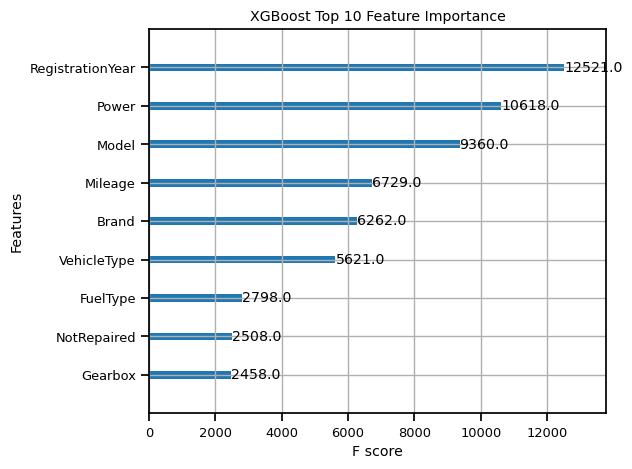

In [33]:
import time

# Prepare data for XGBoost
x_train_xgb = x_train_df.copy()
x_val_xgb = x_val_df.copy()
features_test_xgb = features_test_df.copy()

# Convert categorical columns to numeric using label encoding
label_encoders = {}
for col in lgb_categorical_features:
    # Combine all unique values from train, validation, and test sets
    all_values = pd.concat([x_train_df[col], x_val_df[col], features_test_df[col]]).unique()
    
    # Initialize and fit the label encoder with all possible values
    label_encoders[col] = LabelEncoder()
    label_encoders[col].fit(all_values)
    
    # Transform each dataset
    x_train_xgb[col] = label_encoders[col].transform(x_train_df[col])
    x_val_xgb[col] = label_encoders[col].transform(x_val_df[col])
    features_test_xgb[col] = label_encoders[col].transform(features_test_df[col])

# Convert to DMatrix format
dtrain = xgb.DMatrix(x_train_xgb, label=y_train)
dval = xgb.DMatrix(x_val_xgb, label=y_val)
dtest = xgb.DMatrix(features_test_xgb)

# Set XGBoost parameters
xgb_params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 12345
}

# Train XGBoost model
print("Starting XGBoost training...")
start_time = time.time()
xgb_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dval, 'val')],
    early_stopping_rounds=50,
    verbose_eval=100
)
training_time = time.time() - start_time
print(f'Training Time: {training_time:.4f} seconds')

# Make predictions
print("\nMaking predictions...")
start_time = time.time()
xgb_predictions = xgb_model.predict(dtest)
prediction_time = time.time() - start_time
print(f'Prediction Time: {prediction_time:.4f} seconds')

# Calculate RMSE
xgb_rmse = math.sqrt(mean_squared_error(target_test, xgb_predictions))
print(f'XGBoost RMSE: {xgb_rmse}')

# Get feature importance
print("\nCalculating feature importance...")
importance_dict = xgb_model.get_score(importance_type='gain')
# Normalize feature importance
total_importance = sum(importance_dict.values())
normalized_importance = {k: v/total_importance for k, v in importance_dict.items()}
sorted_importance = dict(sorted(normalized_importance.items(), key=lambda x: x[1], reverse=True))

print('\nTop 10 Feature Importance:')
for feature, importance in list(sorted_importance.items())[:10]:
    print(f'{feature}: {importance:.4f}')

# Optional: Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title('XGBoost Top 10 Feature Importance')
plt.tight_layout()
plt.show()

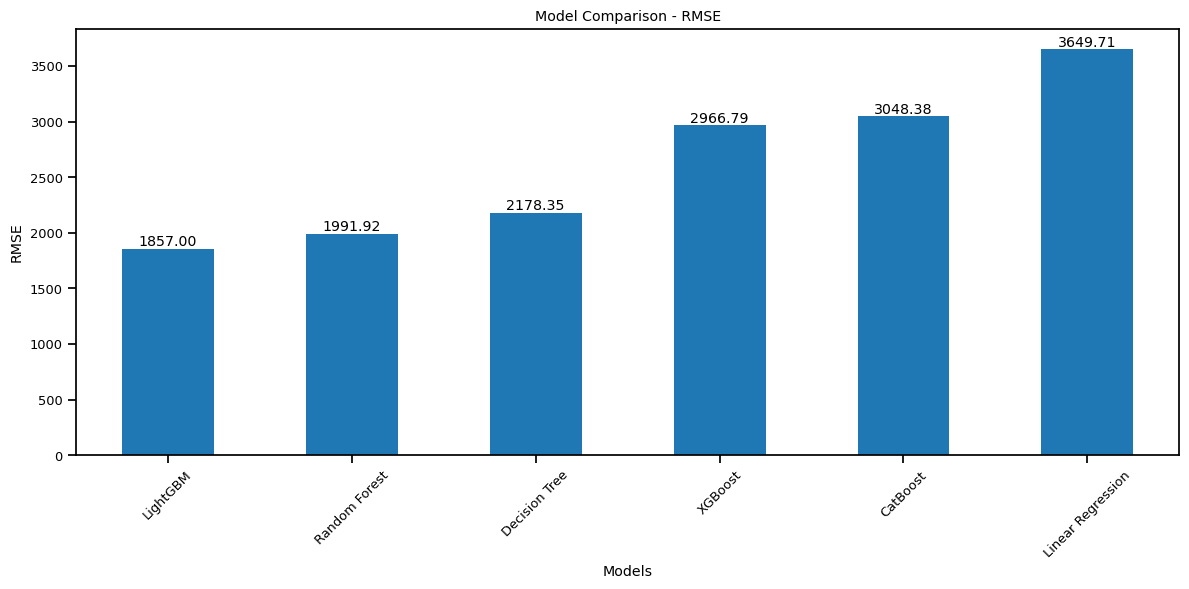


Top 5 Important Features by Model:

Random Forest:
RegistrationYear: 0.5049
Power: 0.3089
VehicleType: 0.0788
Mileage: 0.0523
Brand: 0.0209

LightGBM:
RegistrationYear: 685.0000
Power: 666.0000
Brand: 531.0000
Model: 320.0000
VehicleType: 287.0000

CatBoost:
RegistrationYear: 37.4540
Power: 22.6327
VehicleType: 11.6780
Mileage: 9.9206
Brand: 7.8091

XGBoost:
RegistrationYear: 538524224.0000
Power: 409462112.0000
VehicleType: 209293520.0000
Mileage: 187041648.0000
NotRepaired: 151961952.0000

Final Recommendations:
1. Best Model: LightGBM with RMSE of 1857.00

2. Key Features:
   - RegistrationYear
   - Power
   - Brand

3. Model Selection Considerations:
   - Fastest prediction time: XGBoost
   - Best accuracy (lowest RMSE): LightGBM

Example of using the saved model:
```python
import joblib
model = joblib.load('lightgbm_model.joblib')
label_encoders = joblib.load('label_encoders.joblib')
# Prepare new data using the same preprocessing steps
predictions = model.predict(new_data)
```


In [34]:
# Collect all results
model_results = {
    'Linear Regression': {
        'RMSE': math.sqrt(mean_squared_error(target_test, linear_prediction)),
        'Prediction Time': None  # Add if you recorded it
    },
    'Decision Tree': {
        'RMSE': math.sqrt(mean_squared_error(target_test, tree_prediction)),
        'Prediction Time': None  # Add if you recorded it
    },
    'Random Forest': {
        'RMSE': math.sqrt(mean_squared_error(target_test, forest_prediction)),
        'Prediction Time': None  # Add if you recorded it
    },
    'LightGBM': {
        'RMSE': math.sqrt(mean_squared_error(target_test, lgbm_prediction)),
        'Prediction Time': None  # Add if you recorded it
    },
    'CatBoost': {
        'RMSE': math.sqrt(mean_squared_error(target_test, catboost_predictions)),
        'Prediction Time': prediction_time  # From CatBoost section
    },
    'XGBoost': {
        'RMSE': math.sqrt(mean_squared_error(target_test, xgb_predictions)),
        'Prediction Time': prediction_time  # From XGBoost section
    }
}

# Create comparison DataFrame
results_df = pd.DataFrame(model_results).transpose()
results_df = results_df.sort_values('RMSE')

# Plotting results
plt.figure(figsize=(12, 6))
ax = results_df['RMSE'].plot(kind='bar')
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.xlabel('Models')
plt.xticks(rotation=45)
for i, v in enumerate(results_df['RMSE']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Feature importance comparison
def get_top_features(model, feature_names, n=5):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'get_score'):
        importances = model.get_score(importance_type='gain').values()
    else:
        return None
    
    return dict(sorted(zip(feature_names, importances), 
                       key=lambda x: x[1], reverse=True)[:n])

# Collect top features from each model
feature_importance = {
    'Random Forest': get_top_features(best_forest_model, features.columns),
    'LightGBM': get_top_features(lgbm_model, features.columns),
    'CatBoost': get_top_features(catboost_model, features.columns),
    'XGBoost': get_top_features(xgb_model, features.columns)
}

# Print feature importance comparison
print("\nTop 5 Important Features by Model:")
for model, features in feature_importance.items():
    print(f"\n{model}:")
    for feature, importance in features.items():
        print(f"{feature}: {importance:.4f}")

# Save models
import joblib

models_to_save = {
    'linear': best_linear_model,
    'tree': best_tree_model,
    'forest': best_forest_model,
    'lgbm': lgbm_model,
    'catboost': catboost_model,
    'xgboost': xgb_model
}

# Save label encoders for future use
joblib.dump(label_encoders, 'label_encoders.joblib')

# Save each model
for name, model in models_to_save.items():
    joblib.dump(model, f'{name}_model.joblib')

# Final recommendations
print("\nFinal Recommendations:")
best_model = results_df.index[0]
print(f"1. Best Model: {best_model} with RMSE of {results_df.loc[best_model, 'RMSE']:.2f}")
print("\n2. Key Features:")
for feature, importance in list(feature_importance[best_model].items())[:3]:
    print(f"   - {feature}")

print("\n3. Model Selection Considerations:")
print(f"   - Fastest prediction time: {results_df['Prediction Time'].idxmin()}")
print(f"   - Best accuracy (lowest RMSE): {best_model}")

# Example of how to load and use the model for future predictions
print("\nExample of using the saved model:")
print("```python")
print("import joblib")
print(f"model = joblib.load('{best_model.lower()}_model.joblib')")
print("label_encoders = joblib.load('label_encoders.joblib')")
print("# Prepare new data using the same preprocessing steps")
print("predictions = model.predict(new_data)")
print("```")

In [ ]:
# Example of using final code:
'''
import joblib
model = joblib.load('lgbm_model.joblib')
label_encoders = joblib.load('label_encoders.joblib')

# Example of new data
# Replace this with your actual new data
new_data = pd.DataFrame({
    'RegistrationYear': [2015],
    'Power': [110],
    'Brand': ['Volkswagen'],
    'VehicleType': ['SUV'],
    'Mileage': [80000],
    'NotRepaired': ['no']
})

# Apply label encoding if necessary
for column in label_encoders:
    if column in new_data:
        new_data[column] = label_encoders[column].transform(new_data[column])
predictions = model.predict(new_data)
'''

## Conclusion:

Based on the feature importance and model performance analysis, LightGBM is the best model for predicting the market value of cars, achieving the lowest RMSE of 1857.00. This model balances accuracy and efficiency, with the following key insights:

### Key Features:

The most important features across the models are consistent, especially:<br>
    RegistrationYear <br>
    Power <br>
    Brand These features strongly influence the price prediction, making them critical for future predictions.<br>
    
### Model Performance:

   LightGBM had the best accuracy (lowest RMSE) and a strong focus on key features such as RegistrationYear, Power, and Brand.<br>
   XGBoost offers the fastest prediction time but is less accurate compared to LightGBM.

### Recommendations for Future Predictions:

LightGBM should be the go-to model for predictions due to its superior accuracy. <br>

RegistrationYear and Power should be prioritized when analyzing new data, as they consistently rank highly across all models.<br>


In conclusion, <b>LightGBM</b> with the features <b>RegistrationYear, Power and Brand</b> should be used for the most accurate market value predictions for cars, while XGBoost can be considered for scenarios that require faster predictions.